# This file will contain simulations of various experiments


## Introduction

Here, we will

In [24]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
import imp
import biofilm_functions as bio


## Experiment 0

This is to test the functions. 


z mic plankton: [ 1.  4.  3. 12.  2.  8.  6. 24.]
z mic biofilm: [ 6.  9.  8. 17.  7. 13. 11. 29.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[100. 100.   0. ...   0.   0.   0.]
 [101. 100.   0. ...   0.   0.   0.]
 [105. 103.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


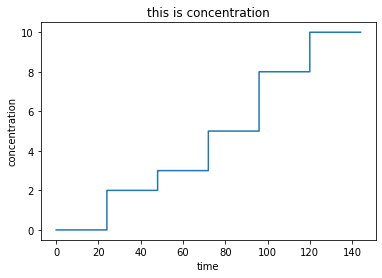

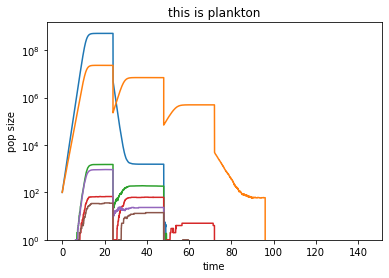

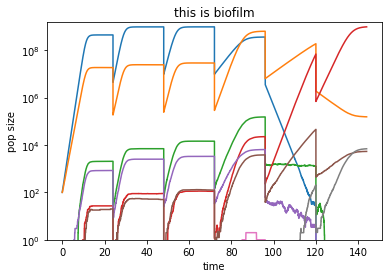

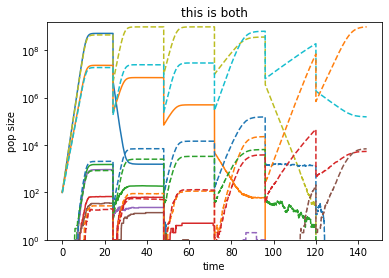

running deterministic simulation


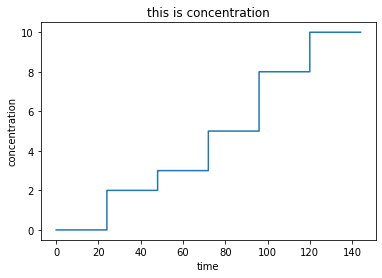

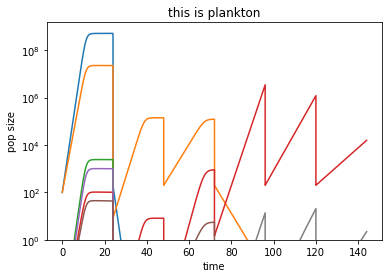

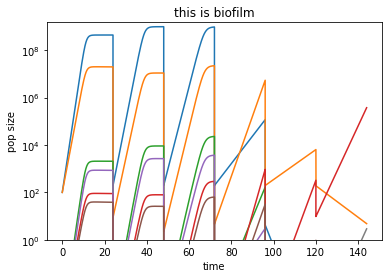

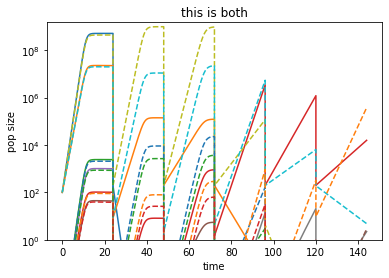

In [36]:
def run_experiment_0(name='experiment'):
    

    ####### GENERAL PROPERTIES OF THE POPULATION ########
    loci=3
    mutation_rate=0.0000010
    cost_vector=[0.5,0.2,0.2]   #loc_costs = 0 * c_c * np.random.rand(k) + c_c
    benefit_vector=[2,3,4]  
    biofilm_benefit=5
    biofilm_cost=0.01
    psi_max_s=0.0231 
    psi_min=-0.0833
    gamma=0.00007
    release_rate=0#0.1
    adhesion_rate=0#0.1##0.00000001

    MIC = 1.0
    ##############################

    init_pop=np.zeros(2**loci)
    car_cap=10**9
    
    ######### PROPERTIES OF THE EXPERIMENT, INCLUDING THE DRUG PARAMETERS #######
    #### non of this matters for the red and green experiement?
    kappa=1.5
    cycle_length = 24 * 60  # length of a cycle in minutes
    init_conc = 0.0 * MIC  # intitial antibiotic concentration
    
    degradation_rate=0#-0.000004
    concentration_gradient=[0,2,3,5,8,10]
    cycle_number=len(concentration_gradient)
    
    
    ########## SPECIFICS OF THIS EXPERIMENT #####################################
    ############ Starting population initialization  ###############

    living_style=0
    init_pop=np.zeros(2**loci)
    init_pop[0]=100  #
    init_pop[1]=100  #
    my_pla_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    my_pla_population2=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z mic plankton:', my_pla_population.z_mic)
    # Define Biofilm population - it is empty

    living_style=1
    init_pop=np.zeros(2**loci)
    init_pop[0]=100
    init_pop[1]=100
    my_bio_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    my_bio_population2=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z mic biofilm:', my_bio_population.z_mic)
    #Run this 
    
    my_treatment=bio.Treatment(concentration_gradient, cycle_length=cycle_length , cycle_number=cycle_number, car_cap=car_cap,kappa=kappa, degradation_rate=degradation_rate)
    my_treatment2=bio.Treatment(concentration_gradient, cycle_length=cycle_length , cycle_number=cycle_number, car_cap=car_cap,kappa=kappa, degradation_rate=degradation_rate)
    my_treatment.run_stochastic_simulation(my_pla_population, my_bio_population)
    my_treatment.plot_results() 
    
    #plt.semilogy(my_treatment.pla_population_record)
    #plt.title('plankton')
    #plt.show()
    #plt.semilogy(my_treatment.bio_population_record, ':')
    #plt.title('biofilm')
    #plt.legend(['pla g', 'pla r', 'bio g', 'bio r'])
    #plt.show()
    
    my_treatment2.run_deterministic_simulation(my_pla_population2, my_bio_population2)
    my_treatment2.plot_results() 
    #np.save(name,complete_dynamics)
    
    return (my_treatment.pla_population_record,my_treatment.pla_population_record)


test=run_experiment_0(name='test')

## Experiment Passages
Here I will define a typical passage experiment

In [41]:
def passage_experiment(name='test0', concentration_gradient=[0,0,0], init_pla=1000, init_bio=1000):
    start = time.time()
    print ('starting')
    
    ####### GENERAL PROPERTIES OF THE POPULATION ########
    loci=4
    mutation_rate=0.0000010
    cost_vector=[0.1,0.1,0.1,0.1]   #loc_costs = 0 * c_c * np.random.rand(k) + c_c
    benefit_vector=[2,3,4,5] 
    if len(cost_vector)>1 &len(cost_vector)<loci:
        print ('cost vector length does not match the number of loci')
    if len(benefit_vector)>1 &len(benefit_vector)<loci:
        print ('benefit vector length does not match the number of loci')

    biofilm_benefit=5
    biofilm_cost=0.05
    psi_max_s=0.0231 
    psi_min=-0.0833
    gamma=0.00007
    release_rate=0#0.1
    adhesion_rate=0#0.1##0.00000001

    MIC = 1.0
    
    ######### PROPERTIES OF THE EXPERIMENT, INCLUDING THE DRUG PARAMETERS #######
    #### non of this matters for the red and green experiement?
    kappa=1.5
    cycle_length = 24 * 60  # length of a cycle in minutes
    init_conc = 0.0 * MIC  # intitial antibiotic concentration
    car_cap=10**9
    
    degradation_rate=0#-0.000004
    #concentration_gradient=[0,2,3,5,8,10,12,14,16,18,20]
    cycle_number=len(concentration_gradient)
    
    
    ########## SPECIFICS OF THIS EXPERIMENT #####################################
    ############ Starting population initialization  ###############

    living_style=0
    init_pop=np.zeros(2**loci)
    init_pop[0]=init_pla  #
    my_pla_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z_mic plankton:', my_pla_population.z_mic)
    # Define Biofilm population - it is empty

    living_style=1
    init_pop=np.zeros(2**loci)
    init_pop[0]=init_bio
    my_bio_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z_mic biofilm:', my_bio_population.z_mic)

    my_treatment=bio.Treatment(concentration_gradient, cycle_length=cycle_length , cycle_number=cycle_number, car_cap=car_cap,kappa=kappa, degradation_rate=degradation_rate)

    #Run this 
    my_treatment.run_stochastic_simulation(my_pla_population, my_bio_population)
    my_treatment.plot_results() 
    
    #plt.semilogy(my_treatment.pla_population_record)
    #plt.title('plankton')
    #plt.show()
    #plt.semilogy(my_treatment.bio_population_record, ':')
    #plt.title('biofilm')
    #plt.legend(['pla g', 'pla r', 'bio g', 'bio r'])
    #plt.show()
    
    #my_treatment2.run_deterministic_simulation(my_pla_population2, my_bio_population2)
    #my_treatment2.plot_results() 
    #np.save(name,complete_dynamics)
    
    
    
    
    end = time.time()
    print ('finished in ', end - start)
    my_treatment.save_output(name)
    return (my_treatment.pla_population_record,my_treatment.pla_population_record, my_treatment.time, my_treatment.concentration_record)

### concentration gradient linear

running simulation no: 0
starting
cost vector length does not match the number of loci
benefit vector length does not match the number of loci
z_mic plankton: [  1.   5.   4.  20.   3.  15.  12.  60.   2.  10.   8.  40.   6.  30.
  24. 120.]
z_mic biofilm: [  6.  10.   9.  25.   8.  20.  17.  65.   7.  15.  13.  45.  11.  35.
  29. 125.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1000.    0.    0. ...    0.    0.    0.]
 [1022.    0.    0. ...    0.    0.    0.]
 [1045.    0.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


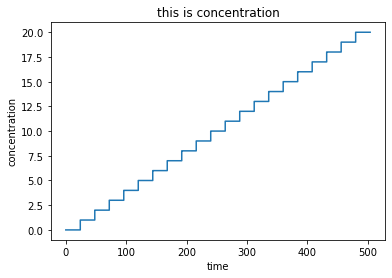

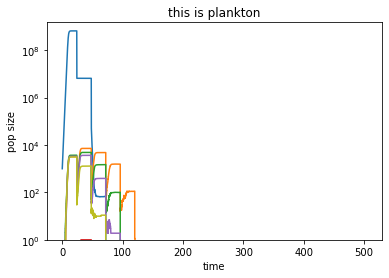

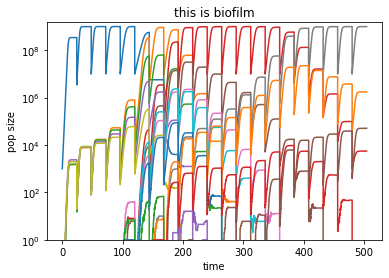

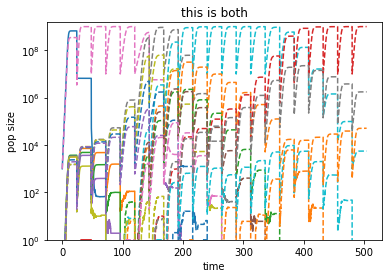

finished in  30.12749409675598
all saved as test0


In [42]:
imp.reload(bio)

name='test'
for i in range (1):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=passage_experiment(name=name+str(i), concentration_gradient=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    np.savetxt(name+'_time.txt', time_r)
    np.savetxt(name+'_conc.txt', conc_r)
    
    

### concentration gradient exponential

running simulation no: 0
starting
cost vector length does not match the number of loci
benefit vector length does not match the number of loci
z_mic plankton: [  1.   5.   4.  20.   3.  15.  12.  60.   2.  10.   8.  40.   6.  30.
  24. 120.]
z_mic biofilm: [  6.  10.   9.  25.   8.  20.  17.  65.   7.  15.  13.  45.  11.  35.
  29. 125.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
propensities are 0
propensities are 0
propensities are 0
propensities are 0
propensities are 0
[[1000.    0.    0. ...    0.    0.    0.]
 [1028.    0.    0. ...    0.    0.    0.]
 [1052.    0.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


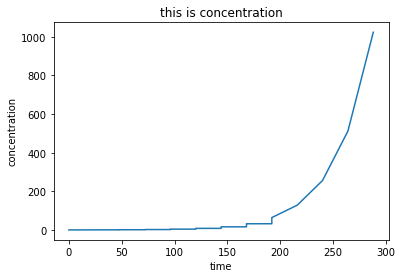

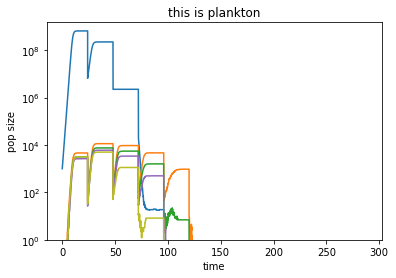

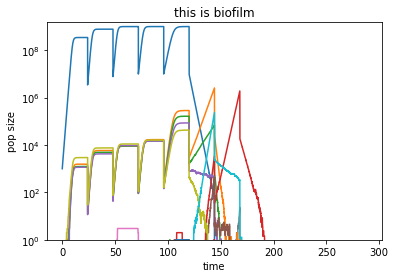

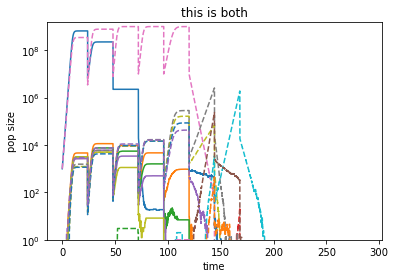

finished in  11.77358627319336
all saved as test0


In [43]:
imp.reload(bio)

name='test'
for i in range (1):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=passage_experiment(name=name+str(i), concentration_gradient=[0,0.5,1,2,4,8,16,32,64,128,256,512,1024])
    np.savetxt(name+'_time.txt', time_r)
    np.savetxt(name+'_conc.txt', conc_r)

In [ ]:
    if serial ==1:
        out_file = open(name+'_input.txt','w')
        out_file.write(
"""
INPUT DATA
loci: %s
mutation rate: %s
benefit vector: %s
cost vector: %s

biofilm_benefit: %s
biofilm_cost: %s
psi_max_s: %s
psi_min: %s
gamma: %s
release_rate: %s
adhesion_rate: %s
MIC = 1.0
    
PROPERTIES OF THE EXPERIMENT, INCLUDING THE DRUG PARAMETERS 
kappa %s
cycle_length  %s
init_conc  %s
car_cap %s
    
degradation_rate %s
cycle_number %s

random seed number: %s
"""% (loci, mutation_rate, benefit_vector, cost_vector, biofilm_benefit, biofilm_cost, psi_max_s, psi_min, gamma, release_rate, adhesion_rate, MIC,kappa,cycle_length,init_conc,car_cap,degradation_rate,cycle_number,random seed number))
        out_file.close()

